# Q12

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [6]:
olivetti = fetch_olivetti_faces()
X = olivetti.data
y = olivetti.target

c:\Users\abdoi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\abdoi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\abdoi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\abdoi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

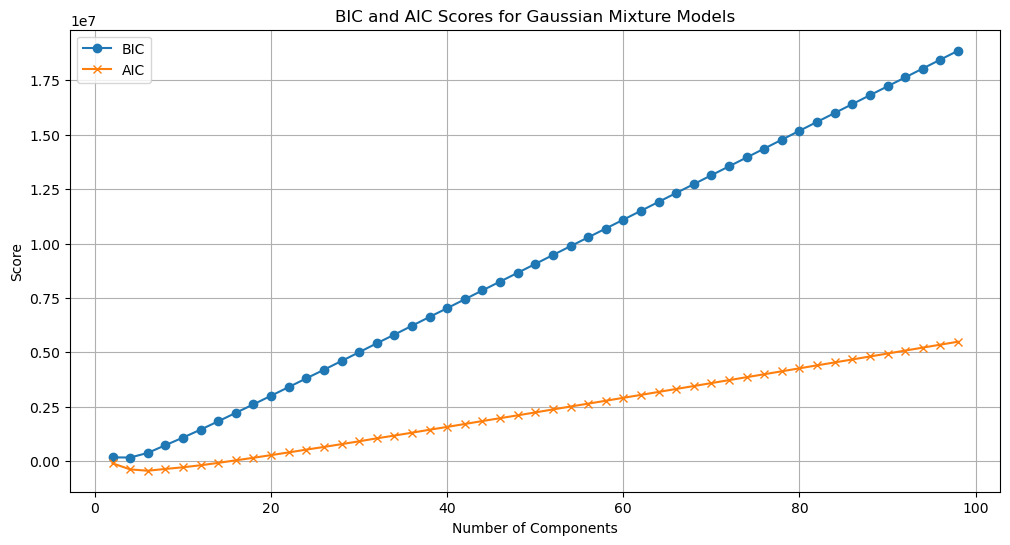

In [7]:
pca = PCA(n_components= 0.99, random_state=42)
X_pca = pca.fit_transform(X)
bic_scores = []
aic_scores = []
for k in range(2, 100, 2):
    # Fit Gaussian Mixture Model
    gmm = GaussianMixture(n_components= k, random_state=42)
    gmm.fit(X_pca)

    # Calculate BIC and AIC
    bic = gmm.bic(X_pca)
    aic = gmm.aic(X_pca)
    bic_scores.append(bic)
    aic_scores.append(aic)

# Plot BIC and AIC scores
plt.figure(figsize=(12, 6))
plt.plot(range(2, 100, 2), bic_scores, label='BIC', marker='o')
plt.plot(range(2, 100, 2), aic_scores, label='AIC', marker='x')
plt.title('BIC and AIC Scores for Gaussian Mixture Models')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

# Find the optimal number of components based on BIC and AIC
optimal_bic_k = np.argmin(bic_scores)
optimal_aic_k = np.argmin(aic_scores)

In [8]:
print(f'Optimal number of components based on BIC: {2 + optimal_bic_k * 2}')
print(f'Optimal number of components based on AIC: {2 + optimal_aic_k * 2}')

Optimal number of components based on BIC: 4
Optimal number of components based on AIC: 6


We'll choose $k$ = 6

In [12]:
gmm = GaussianMixture(n_components= 6, random_state=42).fit(X_pca)

c:\Users\abdoi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [23]:
X_new, y_new = gmm.sample(25)
X_new_orignal_size = pca.inverse_transform(X_new)

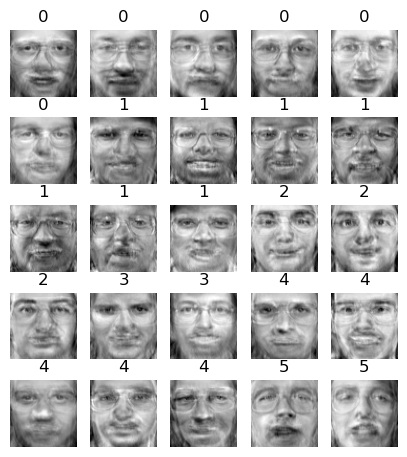

In [24]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

# Plot the generated faces
plot_faces(X_new_orignal_size, y_new)

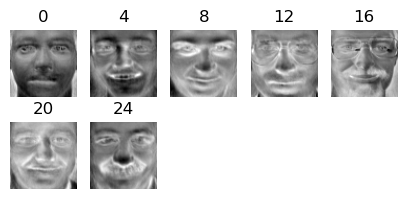

In [46]:
X_normal = X_pca[:280:40]
X_anomaly, y_anomaly = X_pca[:280:40] * -5, y[:280:40]
plot_faces(pca.inverse_transform(X_anomaly) , y_anomaly)

In [47]:
print(f"Score for normal faces: {gmm.score_samples(X_normal)}")
print(f"Score for anomalous faces: {gmm.score_samples(X_anomaly)}")

Score for normal faces: [1227.27101537  841.04962543  841.04880194  841.0459869  1088.22414526
 1124.73814326  841.04995072]
Score for anomalous faces: [-89112329.01792143 -16461849.95543458 -16461551.58963223
 -16461494.81236108 -32401241.79917016 -58339969.93562489
 -16461285.06822814]


The algorithm detects the anomalies with low score

# Q13

Reconstruction error is computed by `MSE(X, X_reconstructed)`

In [49]:
X_normal = X
X_pca = pca.fit_transform(X_normal)
X_reconstructed = pca.inverse_transform(X_pca)
print(f"Reconstruction error for normal instances: {mean_squared_error(X_normal, X_reconstructed):.4f}")

X_anomaly = X * -5
X_pca_anomaly = pca.transform(X_anomaly)
X_reconstructed_anomaly = pca.inverse_transform(X_pca_anomaly)
print(f"Reconstruction error for anomalous instances: {mean_squared_error(X_anomaly, X_reconstructed_anomaly):.4f}")

Reconstruction error for normal instances: 0.0002
Reconstruction error for anomalous instances: 0.0421
